<a href="https://colab.research.google.com/github/suphaporn7041/Data-analyst/blob/main/Auto_mobile_with_EDA_and_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto mobile dataset with EDA(Explore data anlysis) and Machine learning

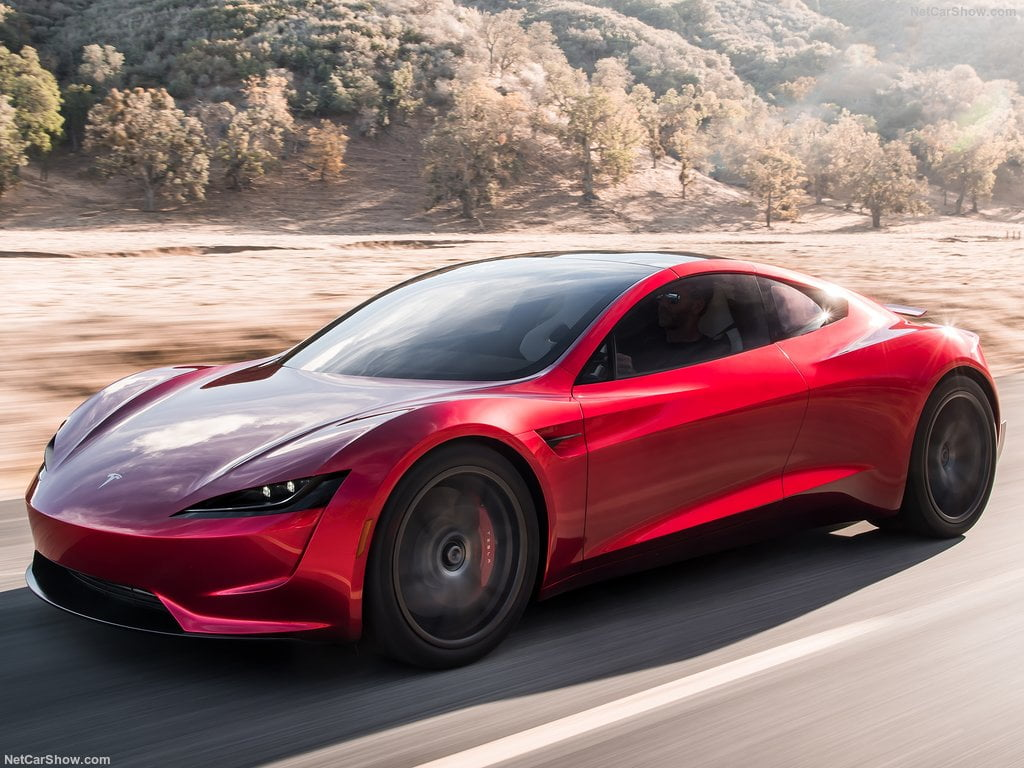

In [1]:
# import necceasary library for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [123]:
# import necceasary library for machine learning
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection, sklearn.tree, sklearn.linear_model, sklearn.cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

# LinearRegression
from sklearn.linear_model import LinearRegression
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# improve and based on classifier
# Import RandomForest
from sklearn.ensemble import RandomForestRegressor
# BaggingClassifier
from sklearn.ensemble import BaggingRegressor
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
# Import roc_auc_score to evaluate ada boosting
from sklearn.metrics import roc_auc_score


**Load the data**

In [3]:
auto = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Data sci/Machine learning/Auto-mpg.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


**Cleaning**

In [4]:
auto.shape

(390, 7)

In [ ]:
auto.isnull().sum()

mpg       0
displ     0
hp        0
weight    0
accel     0
origin    0
size      0
dtype: int64

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [ ]:
# check categories feature
auto['origin'].value_counts()

US        245
Asia       79
Europe     68
Name: origin, dtype: int64

In [ ]:
auto['origin'].astype('category')

0          US
1          US
2        Asia
3          US
4      Europe
        ...  
387        US
388        US
389      Asia
390        US
391        US
Name: origin, Length: 392, dtype: category
Categories (3, object): ['Asia', 'Europe', 'US']

# EDA (Explore data anlysis)

**Topics**

*   Swarmplot & boxplot : combine swarmplot with box plot to show each observation along with summary of distribution
*   Pairplot & categorical data :
*   Histplot : approximate representation of the distribution of data.
*   Pairplot & regresion : linear approach for modelling relationship between datas by using diverging color palettes.
*   Heatmap : magnitude of a phenomenon as color.


In [21]:
sns.set_style('darkgrid')

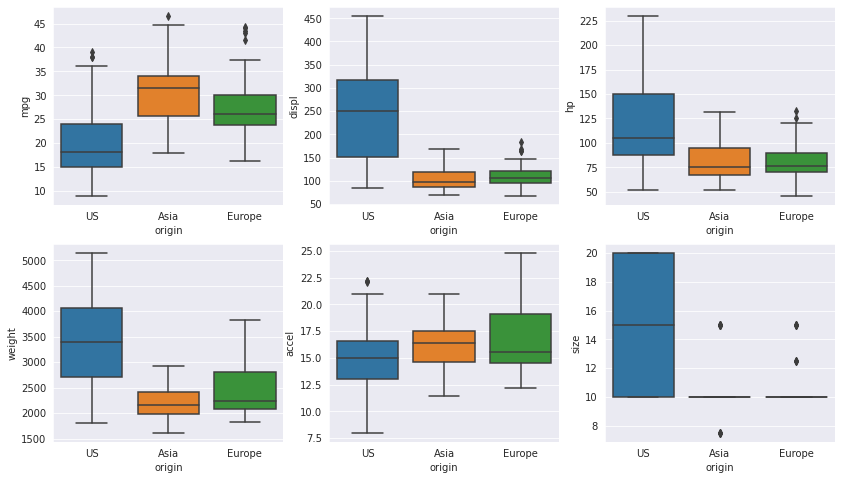

In [121]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

sns.boxplot(ax = axes[0, 0], data=auto, x='origin', y='mpg')
sns.boxplot(ax = axes[0, 1], data=auto, x='origin', y='displ')
sns.boxplot(ax = axes[0, 2], data=auto, x='origin', y='hp')
sns.boxplot(ax = axes[1, 0], data=auto, x='origin', y='weight')
sns.boxplot(ax = axes[1, 1], data=auto, x='origin', y='accel')
sns.boxplot(ax = axes[1, 2], data=auto, x='origin', y='size')

**Observation :**

as you can see The size and displacement of the US data cluster is higher than the other two. This may mean that the feature data has a high variance.
Weight and horsepower It tends to be higher than the other two groups as well.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.6% of the points cannot be placed; y

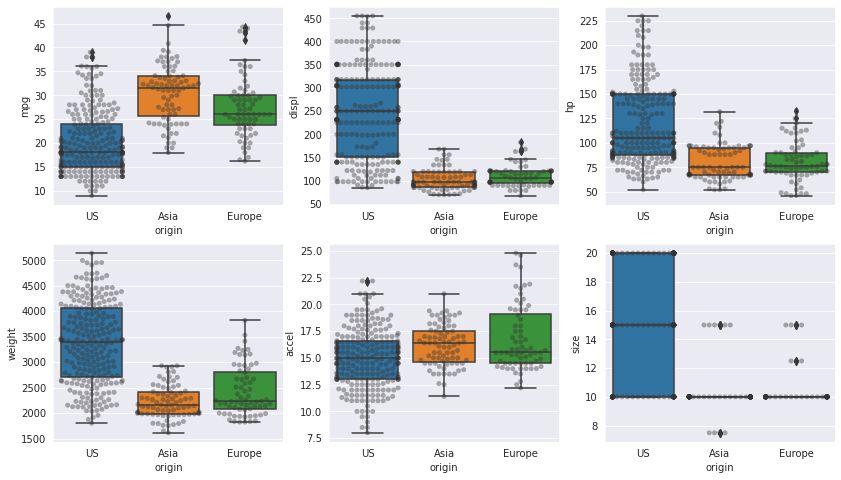

In [123]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

sns.boxplot(ax = axes[0, 0], data=auto, x='origin', y='mpg')
sns.boxplot(ax = axes[0, 1], data=auto, x='origin', y='displ')
sns.boxplot(ax = axes[0, 2], data=auto, x='origin', y='hp')
sns.boxplot(ax = axes[1, 0], data=auto, x='origin', y='weight')
sns.boxplot(ax = axes[1, 1], data=auto, x='origin', y='accel')
sns.boxplot(ax = axes[1, 2], data=auto, x='origin', y='size')

alpha = 0.4
color = '0.2'
sns.swarmplot(ax = axes[0, 0], data=auto, x='origin', y='mpg', alpha= alpha, color= color)
sns.swarmplot(ax = axes[0, 1], data=auto, x='origin', y='displ', alpha= alpha, color= color)
sns.swarmplot(ax = axes[0, 2], data=auto, x='origin', y='hp', alpha= alpha, color= color)
sns.swarmplot(ax = axes[1, 0], data=auto, x='origin', y='weight', alpha= alpha, color= color)
sns.swarmplot(ax = axes[1, 1], data=auto, x='origin', y='accel', alpha= alpha, color= color)
sns.swarmplot(ax = axes[1, 2], data=auto, x='origin', y='size', alpha= alpha, color= color)

**Observation :**

To be clear, we have to use swarm plots to help. It can be seen that the data of the car size is only 2-3 sizes, which means that the data is not scattered as we think. but discreate data. We also saw that the origin US data group was significantly larger.

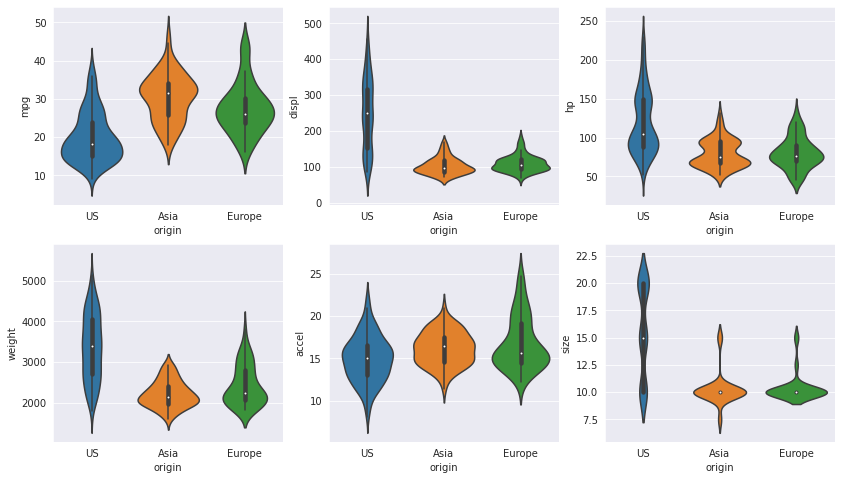

In [97]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

sns.violinplot(ax = axes[0, 0], data=auto, x='origin', y='mpg')
sns.violinplot(ax = axes[0, 1], data=auto, x='origin', y='displ')
sns.violinplot(ax = axes[0, 2], data=auto, x='origin', y='hp')
sns.violinplot(ax = axes[1, 0], data=auto, x='origin', y='weight')
sns.violinplot(ax = axes[1, 1], data=auto, x='origin', y='accel')
sns.violinplot(ax = axes[1, 2], data=auto, x='origin', y='size')

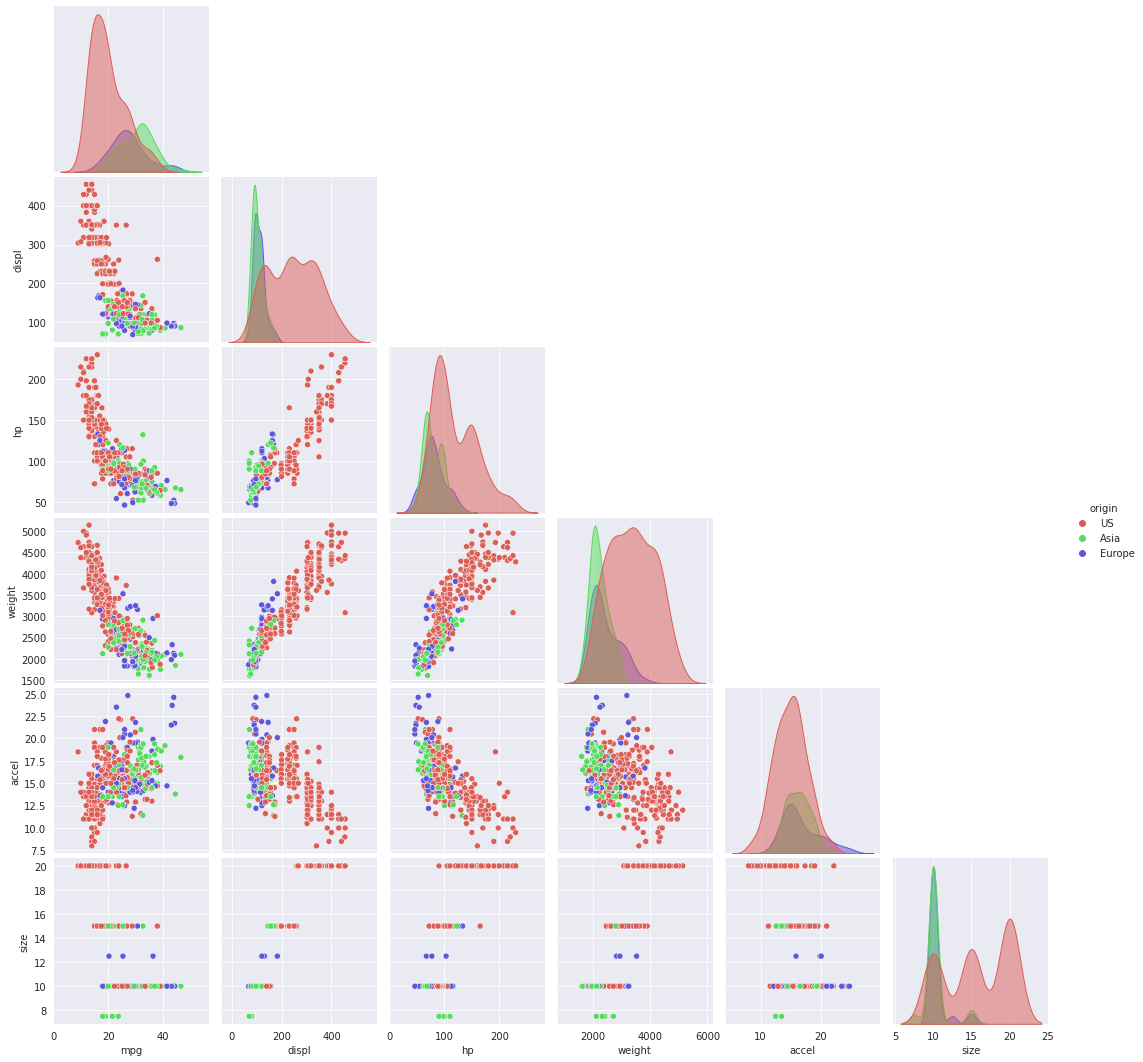

In [ ]:
sns.pairplot(data=auto,
        corner=True,
        vars=numeric_data,
        kind='scatter',
        hue='origin',
        palette='hls',
        diag_kws={'alpha':.5})

**Conclusion :**

The cars from the US are quite large from size 10 15 20, which will be in the same direction as the weight. But on the other hand, the car with the highest acceleration will be the european car.

As for asia cars, it will be the lightest, followed by European cars. But of course, the horsepower is less as well.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


Generating Frequency Plots:   0%|          | 0/7 [00:00<?, ?it/s]

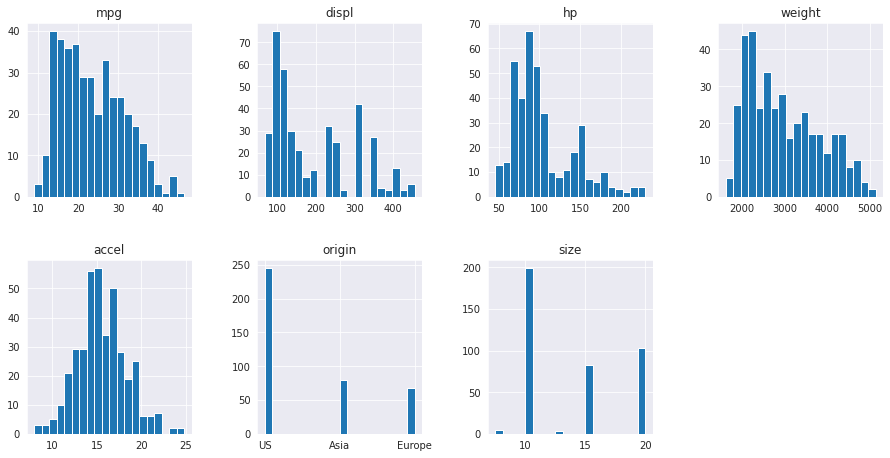

<function matplotlib.pyplot.clf>

In [ ]:
from tqdm import tqdm_notebook

fig = plt.figure(figsize=(13, 7))

for i in tqdm_notebook(range(len(auto.columns)), desc = 'Generating Frequency Plots'):
    fig.add_subplot(np.ceil(len(auto.columns)/4), 4, i+1)
    auto.iloc[:, i].hist(bins=20)
    plt.title(auto.columns[i])
    fig.tight_layout(pad=3.0)
plt.show();

plt.clf

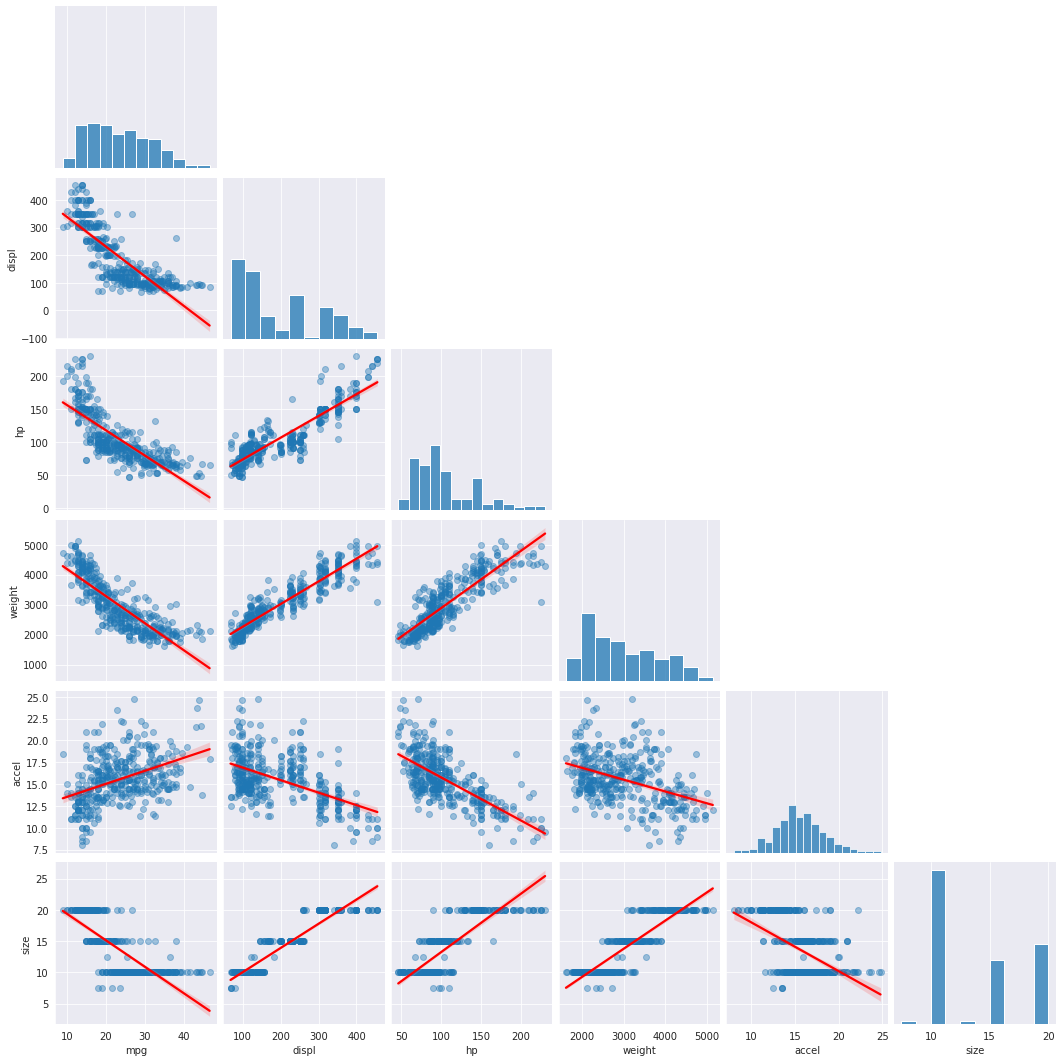

In [ ]:
sns.pairplot(auto, corner=True, kind='reg', 
             palette='husl', 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})

**Observation** : 

Each feature is related by a linear relationship. If you look at the red line, you will see that the slope is quite high. Next, let's use a heatmap to help better describe the relationship.

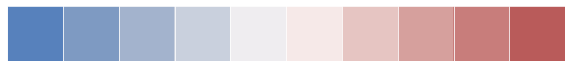

In [ ]:
# Use the diverging color palettes to convey the positive and negative correlation of each feature
sns.palplot(sns.color_palette("vlag", 10))

**We will use the diversity color pallete to give values ​​to variables that are highly correlated**

By if there is a negative correlation, show blue. If there is a positive relationship, show red. But if there is no relationship, dilute the colors accordingly.

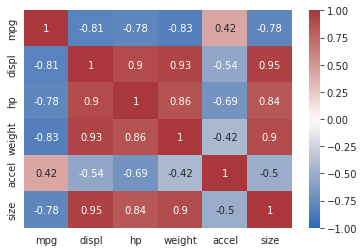

In [ ]:
# coorelation to see relationship each other and set range heatmap to (-1,1)
sns.heatmap(auto.corr(), annot=True, cmap= 'vlag', vmin=-1, vmax=1)

**Conclusion:**

From the heatmap we can see that the target variable: mpg (mile per gallon) has a negative relationship with the other variables. The highest will be weight with a score of -0.83, displacement -0.81 and hoouse power-size with -0.78 


Next, we'll find a model that predicts. most accurate at topic Machine learning.

# Machine learning

**Topics**

*   Linear Regression
*   Decision Tree Regressor
*   Random Forest Regressor
*   Features importances


**Context**
*  Target variable : 'mpg' which mean mile per gallon
*  Features or predictors: 'displ', 'hp', 'weight', 'accel', 'origin', 'size'

Prepare data
*  Generate dummy variable from categorical feature
*  Concatenate with dataframe
*  Droping categorical feature

In [ ]:
df = auto
origin = pd.get_dummies(data=df['origin'])
origin.head()

,Asia,Europe,US
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [ ]:
df = pd.concat([df, origin], axis='columns')

In [ ]:
df.drop('origin', axis=1, inplace=True)
df.head()

,mpg,displ,hp,weight,accel,size,Asia,Europe,US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [ ]:
X = df.drop('mpg', axis=1)
y = df['mpg']

**Create Train and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y=β0+β1x1+...+βnxn$

In [ ]:
# Instantiate model and Fit dt to the training set
model_name = 'LinearRegression'
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate accuracy by compute mean square error and root mean square error
mse_lr = MSE(y_test, y_pred)
rmse_lr = mse_lr**(1/2)

print("Test set MSE of {}: {:.2f}".format(model_name, mse_lr))
print("Test set RMSE of {}: {:.2f}".format(model_name, rmse_lr))

Test set MSE of LinearRegression: 17.30
Test set RMSE of LinearRegression: 4.16


In [ ]:
print('regression equation : y= {:.2f} + B{}'.format(model.intercept_, model.coef_))

regression equation : y= 43.54 + B[ 0.01159148 -0.05086344 -0.00534469  0.08992177 -0.1435047   1.75528319
 -0.31204005 -1.44324314]


## Decision tree

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

model_name = 'Decision Tree Regressor'
# Instantiate model and Fit dt to the training set
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate accuracy by compute mean square error and root mean square error
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)

print("Test set MSE of {}: {:.2f}".format(model_name, mse_dt))
print("Test set RMSE of {}: {:.2f}".format(model_name, rmse_dt))

Test set MSE of Decision Tree Regressor: 20.77
Test set RMSE of Decision Tree Regressor: 4.56


### Bagging Regressor

In [ ]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

model_name = 'Bagging Regressor'
# Instantiate Bagging Regressor and Fit to the training set
bc = BaggingRegressor(base_estimator=dt, random_state=1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

# Evaluate accuracy by compute mean square error and root mean square error
mse_bc = MSE(y_test, y_pred)
rmse_bc = mse_dt**(1/2)

print("Test set MSE of {}: {:.2f}".format(model_name, mse_bc))
print("Test set RMSE of {}: {:.2f}".format(model_name, rmse_bc))

Test set MSE of Bagging Regressor: 19.61
Test set RMSE of Bagging Regressor: 4.56


### Random Forest Regressor

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_name = 'Random Forest Regressor'
# Instantiate Random Forest and Fit to the training set
rf = RandomForestRegressor(n_estimators=25, random_state=1) 
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test)

# Evaluate accuracy by compute mean square error and root mean square error
mse_rf = MSE(y_test, y_pred)
rmse_rf = mse_dt**(1/2)

print("Test set MSE of {}: {:.2f}".format(model_name, mse_rf))
print("Test set RMSE of {}: {:.2f}".format(model_name, rmse_rf))

Test set MSE of Random Forest Regressor: 19.56
Test set RMSE of Random Forest Regressor: 4.56


### features importances

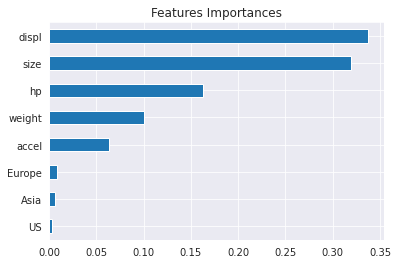

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind = 'barh')
plt.title('Features Importances')
plt.show()

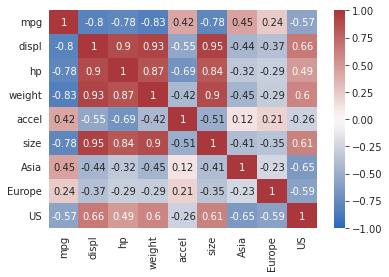

In [ ]:
# coorelation to see relationship 
sns.heatmap(df.corr(), annot=True, cmap= 'vlag', vmin=-1, vmax=1)

**Feature conclusion** :

A large value of correlation does not mean that feature will be important  model. Refer to Features Importances chart whose characteristic priority is Displacement, size, and hp respectively, but heatmap table has high characteristic weight, displacement, and size respectively.

## Conclusion

In [ ]:
Result = pd.DataFrame({ 'Model': ['Linear Regression', 'Decision tree','Bagging', 'Random Forest'],
                       'MSE': [mse_lr, mse_dt, mse_bc, mse_rf],
                       'RMSE': [rmse_lr, rmse_dt, rmse_bc, rmse_rf],
                       })
Result

,Model,MSE,RMSE
0,Linear Regression,17.300744,4.159416
1,Decision tree,20.771375,4.557562
2,Bagging,19.607188,4.557562
3,Random Forest,19.562327,4.557562


Text(0.5, 1.0, 'MSE')

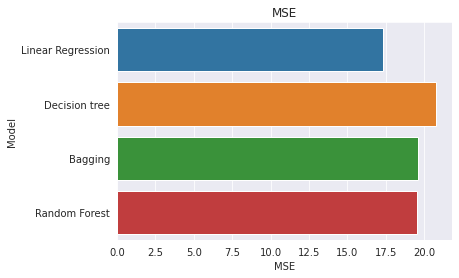

In [ ]:
sns.barplot(y= 'Model', x= 'MSE', data=Result)
plt.title('MSE')

**Conclusion** : 

The Linear Regression was prediction the most accurate at score 17.30 Mean square error, Tree decision give the worst predictors at score 18, and finally, Bagging and Random forest methods gave similar prediction results at score 19.60 and 19.56 Mean square error by order.